In [1]:
import pandas as pd


In [2]:
fake = pd.read_csv("C:/Users/abder/Desktop/fake.csv", header = 0 ,sep=";")

true = pd.read_csv("C:/Users/abder/Desktop/true.csv", header = 0 ,sep=";")

In [3]:
print(len(fake))
print(len(true))

1029
1594


In [4]:
fake.iloc[0,1]

'I slipped when it was raining and then I found myself in the hospital'

In [5]:
fake.head()


,ville,description,isFraud,date
0,kairouan,I slipped when it was raining and then I found...,fake,"""01/01/2019"""
1,sousse,This should state whether the incident was res...,fake,"""01/01/2019"""
2,monastir,It is believed the wire should not have been s...,fake,"""01/01/2019"""
3,tunis,I slipped when it was raining and then I found...,fake,"""01/01/2019"""
4,kairouan,in fact it was really a very risky accident wi...,fake,"""01/01/2019"""


In [6]:
true.head()


,ville,description,isFrauad,date
0,kairouan,A pedestrian hit me and went under my car.,True,"""01/01/2019"""
1,kairouan,The guy was all over the road and I had to swe...,True,"""01/01/2019"""
2,sousse,"I pulled away from the side of the road, glanc...",True,"""01/01/2019"""
3,monastir,free movement. But nowadays the word is more c...,True,"""01/01/2019"""
4,tunis,Illness has three definitions. Two of them are...,True,"""01/01/2019"""


In [7]:
import re


In [8]:
#suppresion des caractères indésirables (@..., #...hashtags, les url, les auteurs à la fin: Photo by... )

for i in range (0,len(fake)):
    fake.iloc[i,1] = re.sub('.@\w*. ','', fake.iloc[i,1])

for i in range (0,len(true)):
    true.iloc[i,1] = re.sub('.@\w*. ','', true.iloc[i,1])

for i in range (0,len(fake)):
    fake.iloc[i,1] = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', fake.iloc[i,1], flags=re.MULTILINE)

for i in range (0,len(true)):
    true.iloc[i,1] = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', true.iloc[i,1], flags=re.MULTILINE)

for i in range (0,len(fake)):
    fake.iloc[i,1] = re.sub("pic.twitter.com.\w*", "",fake.iloc[i,1])

for i in range (0,len(true)):
    true.iloc[i,1] = re.sub("pic.twitter.com.\w*", "",true.iloc[i,1])
    
for i in range (0,len(fake)):
    fake.iloc[i,1] = re.sub('Featured image.*|Photo by.*|#\w*',"",fake.iloc[i,1])

for i in range (0,len(true)):
    true.iloc[i,1] = re.sub('Featured image.*|Photo by.*|#\w*',"",true.iloc[i,1])

In [9]:
'''En vue de donner les fonctions des mots (tagging) et d'identifier les mots les plus fréquents, on fusionne
les textes dans chaque base de données''' 

S_true= ""
for i in range (0,len(true)):
    S_true = S_true + true.iloc[i,1]

In [10]:

S_fake= ""
for i in range (0,len(fake)):
    S_fake = S_fake + fake.iloc[i,1]

In [11]:
#importation du package natural langage toolkit et de package pour tokenizer (séparer le texte en mots)

import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abder\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
##importation du package pour identifier les fonction des mots

nltk.download("averaged_perceptron_tagger")
from nltk.tag import pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abder\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [13]:
tokenizer = nltk.RegexpTokenizer(r"\w+") ## on choisit une méthode de tokenization qui supprime la ponctuation
tokens_fake = tokenizer.tokenize(S_fake.lower()) ## tokenizer en suprimant la ponctuation et meetre en minuscule le texte
S_fake = nltk.Text(tokens_fake) 
tags_f = nltk.pos_tag(S_fake)  #attribuer la fonction de chaque mot

In [14]:
##importer un package qui compte les mots 

from collections import Counter
counts_tag_fake = Counter(tag for word,tag in tags_f)

In [15]:
##effectuer le compte dans la base fake

total_f = sum(counts_tag_fake.values())
d_f= dict((word, float(count)/total_f) for word,count in counts_tag_fake.items())

In [16]:
tokens_true = tokenizer.tokenize(S_true.lower())
S_true = nltk.Text(tokens_true)
tags_t = nltk.pos_tag(S_true)

In [19]:
counts_tag_true = Counter(tag for word,tag in tags_t)


In [20]:
##faire le total de chaque fonction de mots : i.e : compter tous les noms 

total_t = sum(counts_tag_true.values())
d_t= dict((word, float(count)/total_f) for word,count in counts_tag_true.items())

In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
##spécifier qu'on veut des stopword anglais
stop_words = set(stopwords.words('english'))

In [27]:
##filtrer les stopwords

stop_words = set(stopwords.words('english'))
filtered_fake = [] 
  
for w in S_fake: 
    if w not in stop_words: 
        filtered_fake.append(w)

In [28]:
import collections
counts_nsw_f = collections.Counter(filtered_fake)

In [29]:
filtered_true = [] 
  
for w in S_true: 
    if w not in stop_words: 
        filtered_true.append(w)

In [30]:
##compter combien de fois chaque mot revient

counts_nsw_t = collections.Counter(filtered_true)

In [31]:
##regrouper dans dans un dataframe les 10 mots les  plus fréquents avec leurs effectifs respectifs

count_mc_f = pd.DataFrame(counts_nsw_f.most_common(10),
                             columns=['words', 'count'])
count_mc_f.head()

,words,count
0,collided,1001
1,way,1000
2,coming,1000
3,stationary,999
4,truck,999


In [32]:
count_mc_t = pd.DataFrame(counts_nsw_t.most_common(10),
                             columns=['words', 'count'])
count_mc_t.head()

,words,count
0,happened,3128
1,incident,1566
2,include,1565
3,employee,1564
4,involved,1564


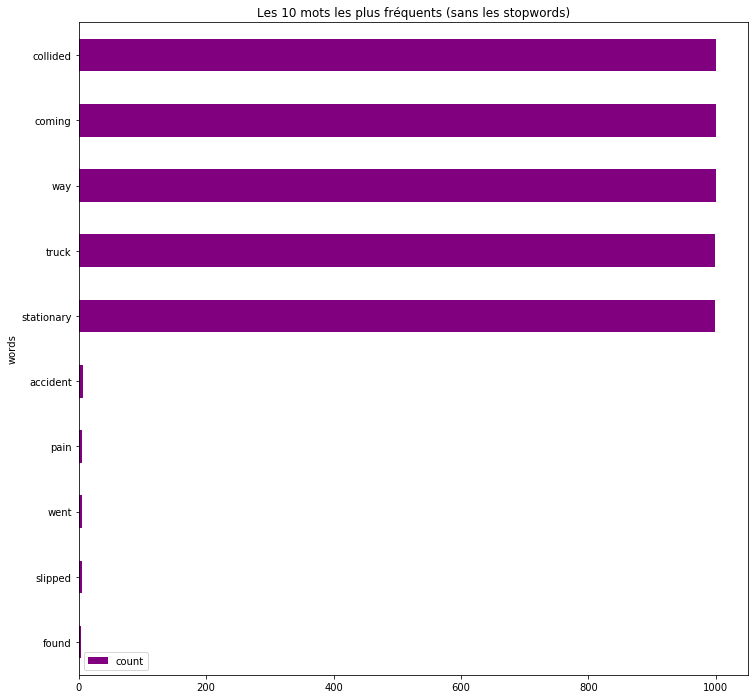

<Figure size 432x288 with 0 Axes>

In [33]:
##représentation graphique des effectifs des mots les  plus fréquents dans la base des fake news

fig, ax = plt.subplots(figsize=(12, 12))

# Plot horizontal bar graph
count_mc_f.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Les 10 mots les plus fréquents (sans les stopwords)")

plt.show()

plt.savefig('fake_words.png')

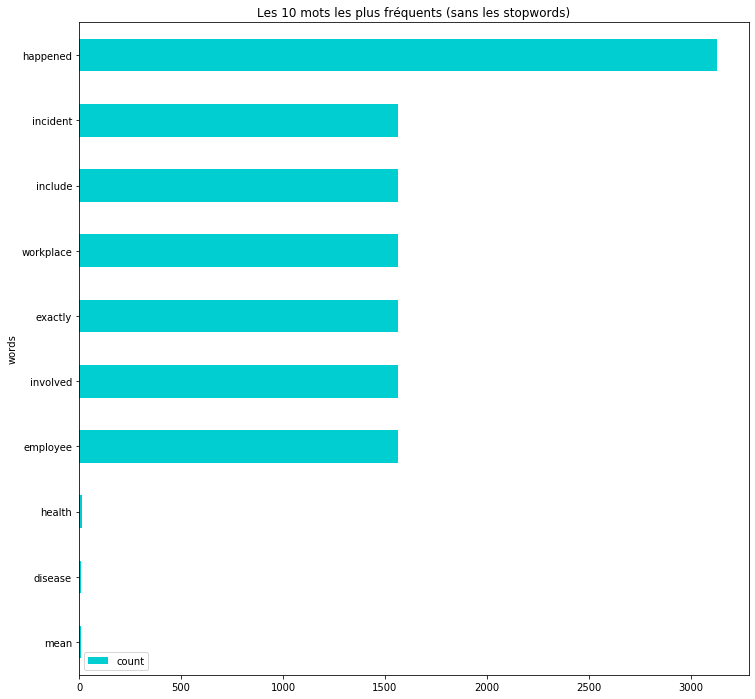

<Figure size 432x288 with 0 Axes>

In [34]:
##représentation graphique des effectifs des mots les  plus fréquents dans la base des true news

fig, ax = plt.subplots(figsize=(12, 12))

# Plot horizontal bar graph
count_mc_t.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="darkturquoise")

ax.set_title("Les 10 mots les plus fréquents (sans les stopwords)")

plt.show()
plt.savefig('truee_words.png')

In [35]:
#ajoutons à chaque base, la variable  Nature pour indiquer si l'info est vraie ou fausse

fake['Nature'] = "faux"
true['Nature'] = "vrai"

In [37]:
#fusionner les deux bases 

mabase = fake.append(true,ignore_index=True,sort=True)

In [38]:
##tokenization and lowercasing

mabase['tokenized_text'] = mabase.apply(lambda row: tokenizer.tokenize((row['description']).lower()) , axis=1)

In [39]:
##stopwords removing

mabase['wst_text'] = mabase['tokenized_text'].apply(lambda x: [item for item in x if item not in stop_words])

In [40]:
#importer la base pour la lemmatisation (stemming)

from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [41]:
##stemming

mabase['stem_text'] = mabase['wst_text'].apply(lambda x: [ps.stem(y) for y in x])

In [42]:
list(mabase)

['Nature',
 'date',
 'description',
 'isFrauad',
 'isFraud',
 'ville',
 'tokenized_text',
 'wst_text',
 'stem_text']

In [44]:
mabase.iloc[0,8]


['slip', 'rain', 'found', 'hospit']

In [45]:
## lorsqu'on passe ensuite à la classification en utilisant directement cette colonne 'stem_text' une erreur est générée car 
## car 'stem_text' contient des listes. pour éviter cela nous ramenons les listes contenues dans cette colonne sous forme de 
## de texte. Pour cela nous créons une nouvelle variable qui va contenir le texte lemmatisé 

mabase['re_stem_text']=""

In [46]:
for i in range (0,len(mabase)):
    mabase.iloc[i,9] = " ".join(mabase.iloc[i,8])

In [47]:

x = mabase['re_stem_text']
y = mabase.Nature
len(y)

2623

In [48]:

##construction d'une fonction de graphique pour les matrices de confusion
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",verticalalignment = 'bottom',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [61]:
##importation des differents packages nécessaires

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [62]:
##méthode de Multinomial Naive Bayesian. Pipeline va permettre de réalisation la tranformartion des données avec tfidf et
##de d'apprêter la methode de classification

clf_mlb = Pipeline([('vect', TfidfVectorizer(stop_words='english',lowercase=True,ngram_range=(1,1))), ('mlb',MultinomialNB())])

In [70]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression


       


[0.89353612 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Accuracy: 0.99 (+/- 0.06)
Confusion matrix, without normalization


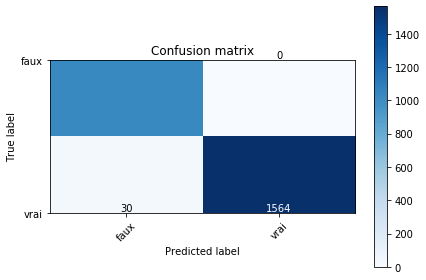

In [73]:
#### méthode de decision tree

from sklearn.model_selection import cross_val_predict
clf_dt = Pipeline([('vect', TfidfVectorizer(stop_words='english',lowercase=True,ngram_range=(1,1))), ('dt',tree.DecisionTreeClassifier())]) 
score_dt = cross_val_score(clf_dt,x,y,cv=10,scoring='accuracy')
print(score_dt)
print("Accuracy: %0.2f (+/- %0.2f)" % (score_dt.mean(), score_dt.std() * 2))
y_pred = cross_val_predict(clf_dt,x , y, cv=10)
conf_mat = confusion_matrix(y, y_pred,labels=['faux', 'vrai'])
plot_confusion_matrix(conf_mat, classes=['faux', 'vrai']) ##dans la fonction de création du graphique pour la matrice de confuision
##mettre cmap=plt.cm.Purples et color="white"
plt.savefig('dt_mat.png')

C:\Users\abder\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.88973384 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Accuracy: 0.99 (+/- 0.07)


C:\Users\abder\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix, without normalization


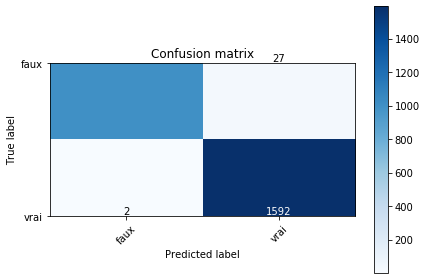

In [74]:
#### regression logistic

clf_lr = Pipeline([('vect', TfidfVectorizer(stop_words='english',lowercase=True,ngram_range=(1,1))), ('lr',LogisticRegression())]) 
score_lr = cross_val_score(clf_lr,x,y,cv=10,scoring='accuracy')
print(score_lr)
print("Accuracy: %0.2f (+/- %0.2f)" % (score_lr.mean(), score_lr.std() * 2))
y_pred = cross_val_predict(clf_lr,x , y, cv=10)
conf_mat = confusion_matrix(y, y_pred,labels=['faux', 'vrai'])
plot_confusion_matrix(conf_mat, classes=['faux', 'vrai'])  ##dans la fonction de création du graphique pour la matrice de confuision
##mettre cmap=plt.cm.Greys et color="white"
plt.savefig('lr_mat.png')

[0.88593156 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Confusion matrix, without normalization


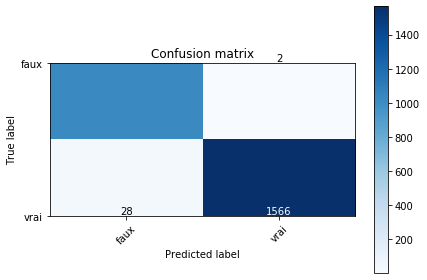

In [75]:
#### méthode de PassiveAggrssiveClassifier


clf_pac = Pipeline([('vect', TfidfVectorizer(stop_words='english',lowercase=True,ngram_range=(1,1))), ('pac',PassiveAggressiveClassifier())]) 
score_pac = cross_val_score(clf_pac,x,y,cv=10,scoring='accuracy')
print(score_pac)
y_pred = cross_val_predict(clf_pac,x, y, cv=10)
conf_mat = confusion_matrix(y, y_pred,labels=['faux', 'vrai'])
plot_confusion_matrix(conf_mat, classes=['faux', 'vrai'])##dans la fonction de création du graphique pour la matrice de confuision
##mettre cmap=plt.cm.Blues et color="white"
plt.savefig('pac_mat.png')

In [76]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score_pac.mean(), score_pac.std() * 2))

Accuracy: 0.99 (+/- 0.07)


In [77]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2,
                                   max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(mabase['re_stem_text'])

In [78]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [79]:
## ici on essaie de mettre en oeuvre la méthode LDA pour la détection de thématiques, afin d'aller au delà de l'objectif de 
## classification et pour mieux comprendre la base de données dont nous disposons. Il faudra réexcuter cette section pour voir
## le graohique interactif 

lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [80]:
tf_feature_names = tfidf_vectorizer.get_feature_names()
tf_feature_names[100:103]

['number', 'olli', 'one']

In [81]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[- n_top_words - 1:][::-1]]))
    print()

In [82]:
##thématiques les plus fréquentes

lda.fit(tfidf)
print_top_words(lda, tf_feature_names, 10)

Topic #0:
burn accid honest health whether day state home present prevent hous
Topic #1:
health diseas head mean case thought judgment difficult part one play
Topic #2:
like form headach condit day sever woke stiff deezi two last
Topic #3:
realli fact leg injuri doctor day gave certif damag felt accid
Topic #4:
stationari truck come collid way went day realli work problem fell
Topic #5:
hospit found slip experi rain health ill exampl diseas munchausen syndrom
Topic #6:
happen workplac involv employe exactli includ incid health exampl similar mean
Topic #7:
patient diseas contest detail left happen understand medic mean suffer claim
Topic #8:
hous accid home broken play slip come collid timothi nearbi center
Topic #9:
without car hit went small use word well road ill see



In [83]:
tr = lda.transform(tfidf)
tr[:5]

array([[0.03335274, 0.033353  , 0.03335274, 0.03335274, 0.03335273,
        0.69982422, 0.03335273, 0.03335274, 0.03335356, 0.0333528 ],
       [0.64452348, 0.03938521, 0.0393826 , 0.03938259, 0.03938258,
        0.03938302, 0.0403883 , 0.03940555, 0.0393826 , 0.03938408],
       [0.02899302, 0.02899301, 0.02899302, 0.02899302, 0.02899301,
        0.02899454, 0.02899301, 0.02899302, 0.02899871, 0.73905566],
       [0.03335274, 0.033353  , 0.03335274, 0.03335274, 0.03335273,
        0.69982422, 0.03335273, 0.03335274, 0.03335356, 0.0333528 ],
       [0.03336798, 0.03336043, 0.03336043, 0.69974516, 0.03336043,
        0.0333605 , 0.03336043, 0.03336043, 0.03336347, 0.03336074]])

In [86]:
import pandas_profiling

ImportError: numpy version 1.17.0 or later must be installed to use Astropy. 

In [85]:
##représentation du graphique interactif

pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vectorizer)

NameError: name 'pyLDAvis' is not defined